/home/leo/apps/miniconda3/envs/py35-anaconda-keras/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


1619.1918319280219 1641.69011896 1628.26446374
1657.2172636424214 1664.71669265 1660.24147424


/home/leo/apps/miniconda3/envs/py35-anaconda-keras/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1605.6865742771415 1630.68467098 1615.76727629
1597.9361456842255 1622.93424239 1608.01684769
2090-12-31     9541.003249
2091-12-31    12906.115076
2092-12-31    13978.525069
2093-12-31    14498.982035
2094-12-31    13894.044469
2095-12-31    13253.333123
2096-12-31    10964.841240
2097-12-31    10072.441031
2098-12-31    12682.165635
2099-12-31    13473.643578
2100-12-31    13613.424060
Freq: A-DEC, dtype: float64


/home/leo/apps/miniconda3/envs/py35-anaconda-keras/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/leo/apps/miniconda3/envs/py35-anaconda-keras/lib/python3.5/site-packages/ipykernel_launcher.py:43: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


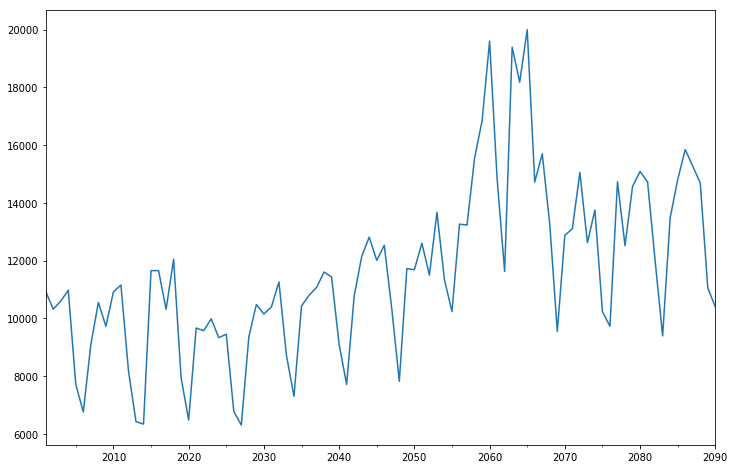

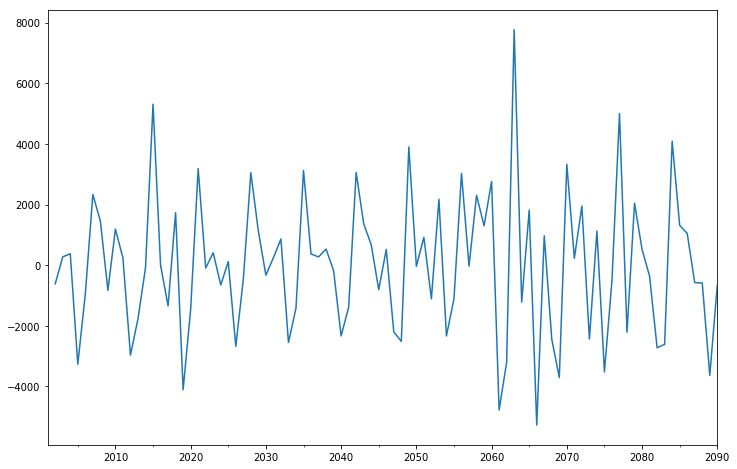

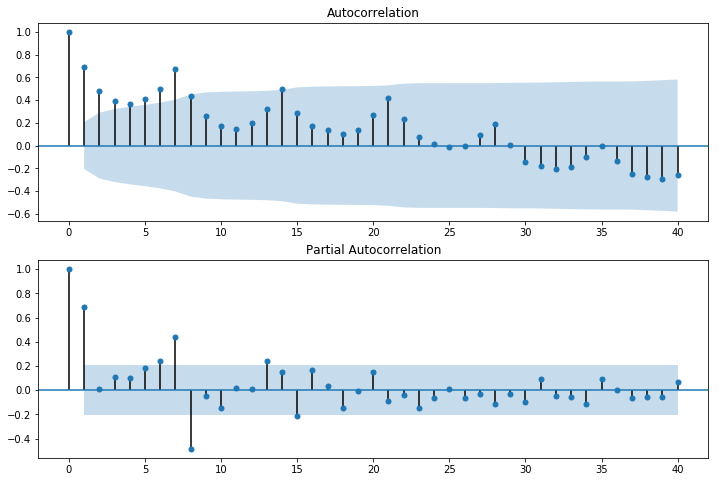

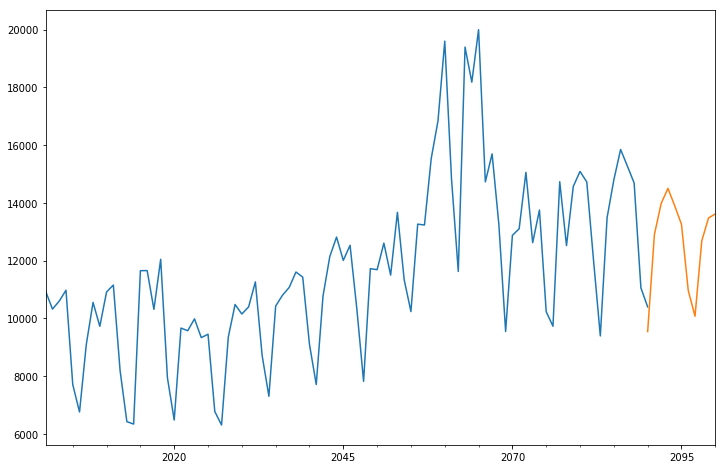

In [1]:
from __future__ import print_function
import pandas as pd
from pandas.core import datetools
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
dta=[10930,10318,10595,10972,7706,6756,9092,10551,9722,10913,11151,8186,6422,
6337,11649,11652,10310,12043,7937,6476,9662,9570,9981,9331,9449,6773,6304,9355,
10477,10148,10395,11261,8713,7299,10424,10795,11069,11602,11427,9095,7707,10767,
12136,12812,12006,12528,10329,7818,11719,11683,12603,11495,13670,11337,10232,
13261,13230,15535,16837,19598,14823,11622,19391,18177,19994,14723,15694,13248,
9543,12872,13101,15053,12619,13749,10228,9725,14729,12518,14564,15085,14722,
11999,9390,13481,14795,15845,15271,14686,11054,10395]
dta=pd.Series(dta)
dta=dta.astype('Float64')#改变数据格式
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('2001','2090'))
dta.plot(figsize=(12,8)) #figsize长和宽的参数
#plt.show()
fig = plt.figure(figsize=(12,8))
ax1= fig.add_subplot(111)
diff1 = dta.diff(1)
diff1.plot(ax=ax1)
#plt.show()
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta,lags=40,ax=ax2)
#plt.show()
arma_mod70 = sm.tsa.ARMA(dta,(7,0)).fit()#模型评估，AIC值
print(arma_mod70.aic,arma_mod70.bic,arma_mod70.hqic)
arma_mod30 = sm.tsa.ARMA(dta,(0,1)).fit()
print(arma_mod30.aic,arma_mod30.bic,arma_mod30.hqic)
arma_mod71 = sm.tsa.ARMA(dta,(7,1)).fit()
print(arma_mod71.aic,arma_mod71.bic,arma_mod71.hqic)
arma_mod80 = sm.tsa.ARMA(dta,(8,0)).fit()
print(arma_mod80.aic,arma_mod80.bic,arma_mod80.hqic)
predict_sunspots = arma_mod80.predict('2090', '2100', dynamic=True)
print(predict_sunspots)
fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.ix['2001':].plot(ax=ax)
predict_sunspots.plot(ax=ax)
plt.show()